In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.1.3
1.4.1


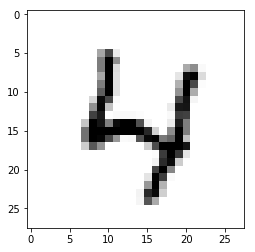

4


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img1 = x_train[314].reshape(-1, 28*28).astype('float32') / 255.0
img1label = y_train[314]

plt.imshow(img1.reshape(28,28), cmap=plt.cm.binary)
plt.show()
print(img1label)

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(28 * 28,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                260       
Total params: 88,285
Trainable params: 88,285
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=60, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 4s 71us/step - loss: 1.5437 - acc: 0.4843 - val_loss: 0.7104 - val_acc: 0.7876
Epoch 2/60
60000/60000 [==============================] - 3s 56us/step - loss: 0.4943 - acc: 0.8556 - val_loss: 0.3604 - val_acc: 0.8938
Epoch 3/60
60000/60000 [==============================] - 3s 56us/step - loss: 0.3123 - acc: 0.9099 - val_loss: 0.2714 - val_acc: 0.9177
Epoch 4/60
60000/60000 [==============================] - 5s 75us/step - loss: 0.2452 - acc: 0.9282 - val_loss: 0.2472 - val_acc: 0.9256
Epoch 5/60
60000/60000 [==============================] - 3s 56us/step - loss: 0.2060 - acc: 0.9392 - val_loss: 0.2104 - val_acc: 0.9360
Epoch 6/60
60000/60000 [==============================] - 3s 56us/step - loss: 0.1794 - acc: 0.9474 - val_loss: 0.1717 - val_acc: 0.9497
Epoch 7/60
60000/60000 [==============================] - 3s 58us/step - loss: 0.1603 - acc: 0.9528 - val_loss: 0.1546 - val_acc

40960/60000 [===================>..........] - ETA: 1s - loss: 0.0035 - acc: 0.9997

In [ ]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()